In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:

#Read the data set
data = pd.read_csv('HR_tech_startup.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Variables transformations
#To plot some statistical graphics and for better understanding, we make some transformations in the variables:

#sales: Rename to department
#salary: Convert the type of the variable from categorical to numerical.

In [5]:
sales = data.groupby(by='sales').count()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [4]:
#"sales" is renamed with "department" now.
data.rename(columns={'sales': 'department'}, inplace = True)


# Convert salary variable type to numeric
data['salary'] = data['salary'].map({'low':1, 'medium':2, 'high':3})


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [9]:
data['salary'].value_counts()

salary
1    7316
2    6446
3    1237
Name: count, dtype: int64

In [5]:
table = data.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table

salary,1,2,3
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


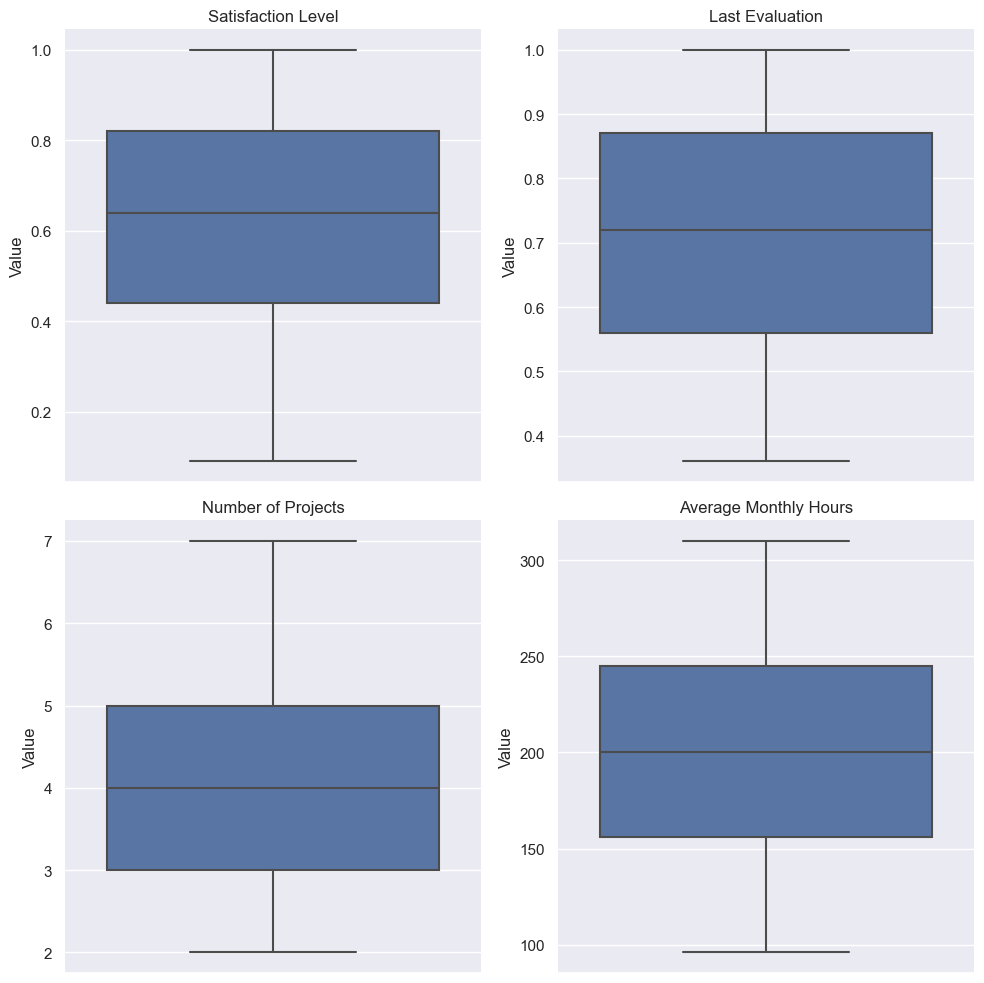

In [11]:

f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust space between subplots

sns.despine(left=True)
sns.boxplot(y='satisfaction_level', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction Level')
axes[0, 0].set_ylabel('Value')

sns.boxplot(y='last_evaluation', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Last Evaluation')
axes[0, 1].set_ylabel('Value')

sns.boxplot(y='number_project', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Number of Projects')
axes[1, 0].set_ylabel('Value')

sns.boxplot(y='average_montly_hours', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Average Monthly Hours')
axes[1, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()


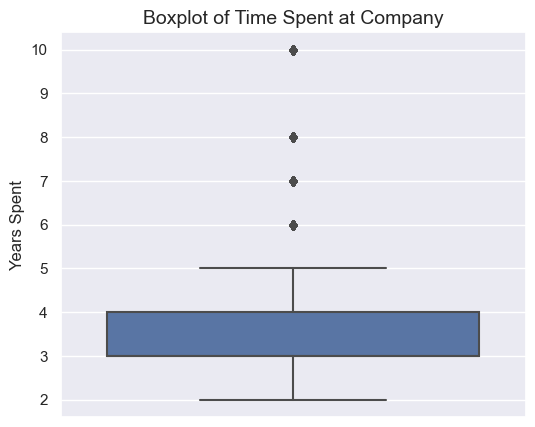

In [28]:
plt.figure(figsize=(6, 5))
sns.boxplot(y='time_spend_company', data=data)
plt.title('Boxplot of Time Spent at Company', fontsize=14)
plt.ylabel('Years Spent', fontsize=12)

# Display the plot
plt.show()

In [5]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                     int64
dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

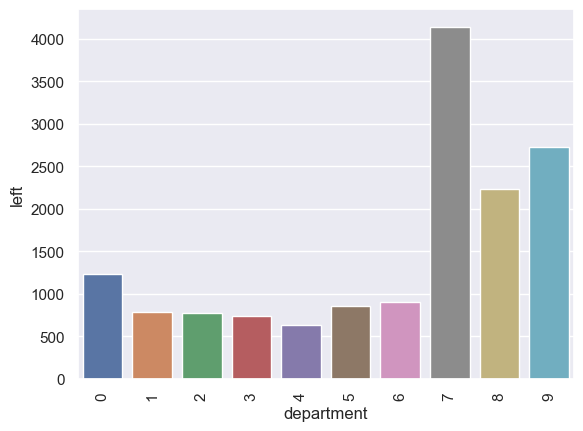

In [10]:
data_group = data.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
plt.xticks(rotation = 90)

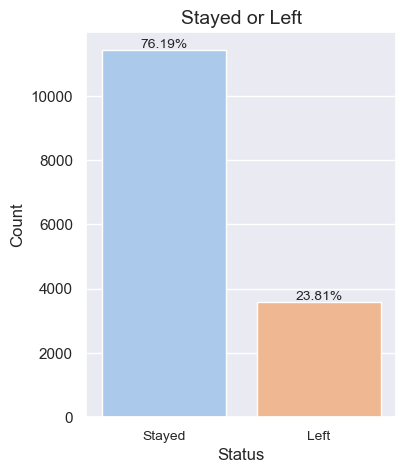

In [8]:
plt.figure(figsize=(4, 5))
ax = sns.countplot(x='left', data=data, palette='pastel')
total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        height + 3, 
        '{:.2f}%'.format((height / total) * 100), 
        ha="center", va='bottom',
        fontsize=10
    )

plt.title('Stayed or Left', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], fontsize=10)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['department'] = encoder.fit_transform(data['department'])
corr = data.corr()
corr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,0.098119
department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,-0.043081
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.043081,1.000000


In [8]:
corr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
department               float64
salary                   float64
dtype: object

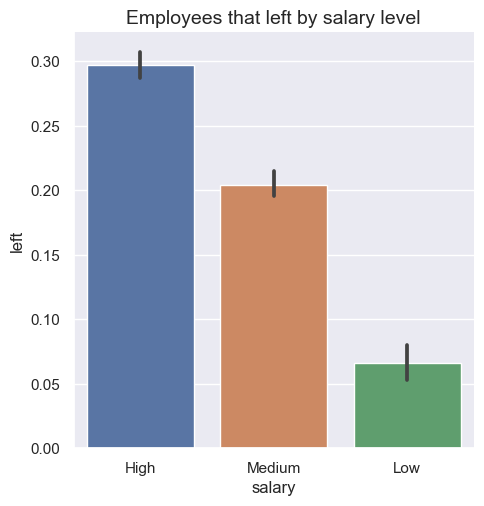

In [15]:
j = sns.catplot(x='salary', y='left', kind='bar', data=data)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low'])

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

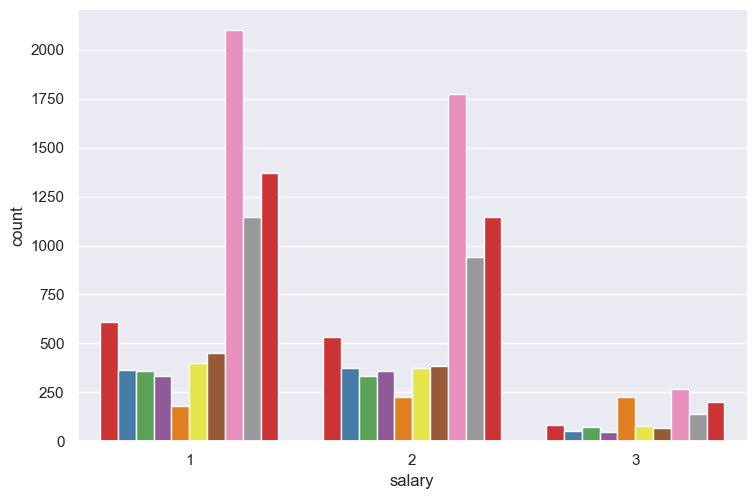

In [18]:
h = sns.catplot(
    x='salary', 
    hue='department', 
    kind='count', 
    height=5,  # Set height of the plot
    aspect=1.5,  # Set aspect ratio
    data=data, 
    palette='Set1'
)

# Add title
h.fig.suptitle("Salaries by Department", fontsize=14, y=1.05)

# Access the Axes object and set x-tick labels
for ax in h.axes.flat:  # Handles multiple facets if present
    ax.set_xticklabels(['High', 'Medium', 'Low'])
plt.show()

In [ ]:


data.dtypes

AttributeError: 'numpy.int64' object has no attribute 'startswith'

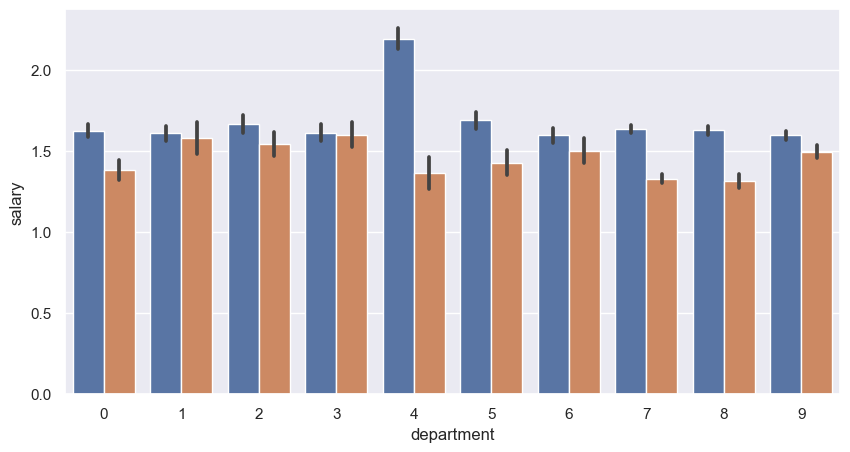

In [13]:

sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='department', y='salary', hue='left', data=data)
plt.title('Salary Comparison', fontsize=14)
plt.show()

In [ ]:
ax = sns.distplot(data['satisfaction_level'])

In [ ]:
#Satisfaction is definitely not normally distributed. 
#You could group the data for additional analyses is based on the histogram above is where the
#bars take a distinctive drop-off.


In [19]:
#I'm going to create a new column and assign qualitative rankings for three(3) Satisfaction levels(High, Medium and Low).
#and add a new column "Sat" to hold the qualitative rankings.

def sat(row):
    if .3 <= row['satisfaction_level'] < .5:
        return 'Medium'
    elif row['satisfaction_level'] >= .5:
        return 'High'
    else:
        return 'Low'

data['Sat'] = data.apply(sat, axis=1)

data_gr = data.groupby(by='Sat',as_index=False).mean()
data_gr.head()

,Sat,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,High,0.748778,0.740814,3.814324,204.656394,3.412154,0.161866,0.098310,0.024386,5.867896,1.625288
1,Low,0.152213,0.781651,5.291272,236.805468,4.288644,0.117245,0.496845,0.012093,5.846477,1.538906
2,Medium,0.411455,0.573588,2.703469,161.674375,3.271913,0.096979,0.597538,0.015666,5.897799,1.515479


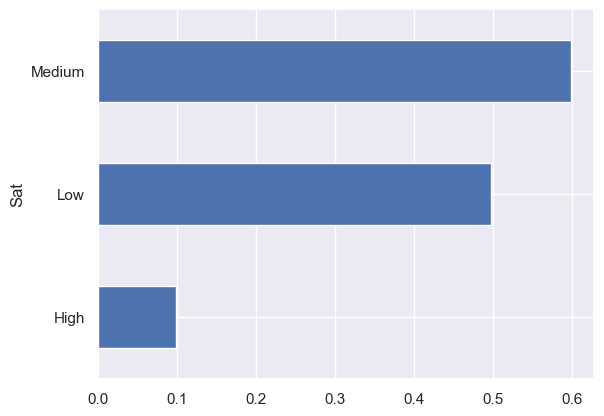

In [20]:
#lets use the Sa


data_group = data.groupby(by=['Sat'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')



In [ ]:
#Well that's interesting.
#Those with medium satisfaction levels are more likely to leave based on percentage of those who left 
#if we use our three-category breakdown.
#This chart suggests that those who are highly satisfied are the least likely to leave, which makes intuitive sense.

In [4]:
#Now let's check out salary, which is an ordinal, string variable in the original dataset.

data_group = data.groupby(by=['salary'],as_index=False).count()
data_group

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
0,high,1237,1237,1237,1237,1237,1237,1237,1237,1237
1,low,7316,7316,7316,7316,7316,7316,7316,7316,7316
2,medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [ ]:
# We see that most people are in the low or medium salary categories. 
#Let's look at the pure count of folks who left in each category.

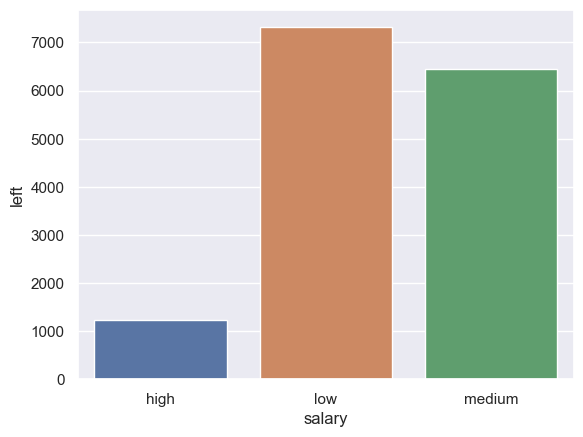

In [5]:
ax = sns.barplot(x="salary", y="left", data=data_group)

In [ ]:
#Now let's look at those who left the company by calculating the percentage or rate.

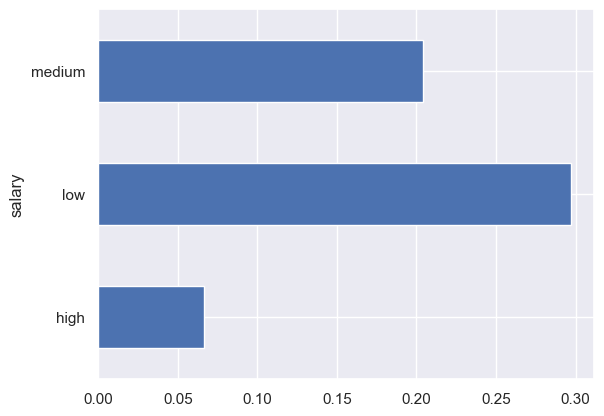

In [6]:
data_group = data.groupby(by=['salary'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

In [ ]:
#Salary appears to have a a linear relationship with leaving, 
#with the more money your earn the less likely you are to leave.
#But, let's see if initial analysis suggest any potential interaction effects between
#salary and satisfaction in terms of leaving the employer.

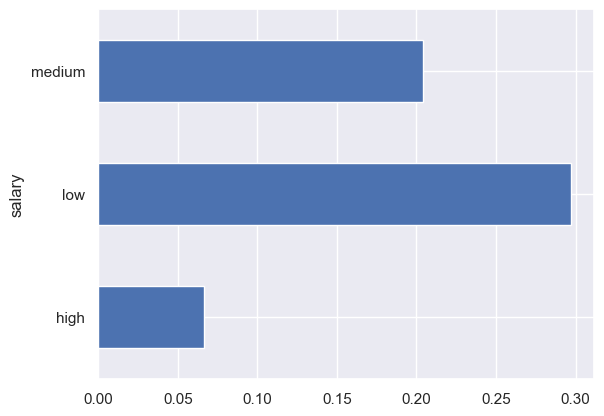

In [8]:
# Set a default value
data_group = data.groupby(by=['salary'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')



In [ ]:
#Findings:
#Employees with the highest rate of leaving earns a low salary and reports a medium satisfaction rate.
#Also Employees with the lowest rate of leaving earns the highest salary and reports the highest satsifaction.